In [1]:
from kaggle_downloader import  get_kaggle_data, load_data, kaggle_download_and_load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import suraj_datalab as sd

In [3]:
# get_kaggle_data('../input', 'playground-series-s4e7')

In [4]:
train = load_data('../input/', 'train.csv')
test = load_data('../input/', 'test.csv')

In [18]:
print(train.head())

   id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   0    Male   21                1         35.0                   0   
1   1    Male   43                1         28.0                   0   
2   2  Female   25                1         14.0                   1   
3   3  Female   35                1          1.0                   0   
4   4  Female   36                1         15.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0    1-2 Year            Yes         65101.0                 124.0      187   
1   > 2 Years            Yes         58911.0                  26.0      288   
2    < 1 Year             No         38043.0                 152.0      254   
3    1-2 Year            Yes          2630.0                 156.0       76   
4    1-2 Year             No         31951.0                 152.0      294   

   Response  
0         0  
1         1  
2         0  
3         0  
4         0  


In [6]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [7]:
sd.analyze.missing_values(train)

,Missing Count,Missing Percentage,Data Type


In [8]:
train['Driving_License'].value_counts()

Driving_License
1    11482041
0       22757
Name: count, dtype: int64

In [17]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [9]:
train['Previously_Insured'].value_counts()

Previously_Insured
0    6178116
1    5326682
Name: count, dtype: int64

In [16]:
train['Response'].value_counts(normalize=True)

Response
0    0.877003
1    0.122997
Name: proportion, dtype: float64

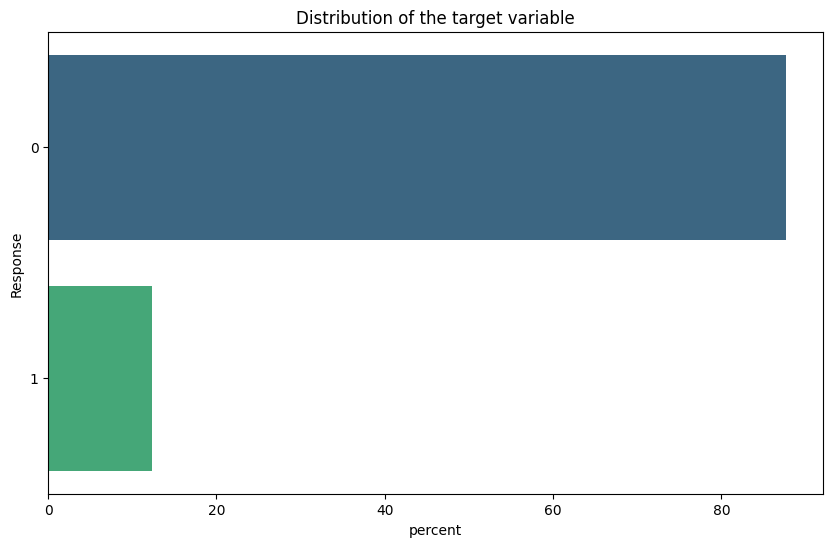

In [15]:
# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(train, y='Response', stat='percent', hue='Response', palette='viridis', legend=False)
plt.title('Distribution of the target variable')
plt.show()

In [11]:
num_cols = ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
cat_cols = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']

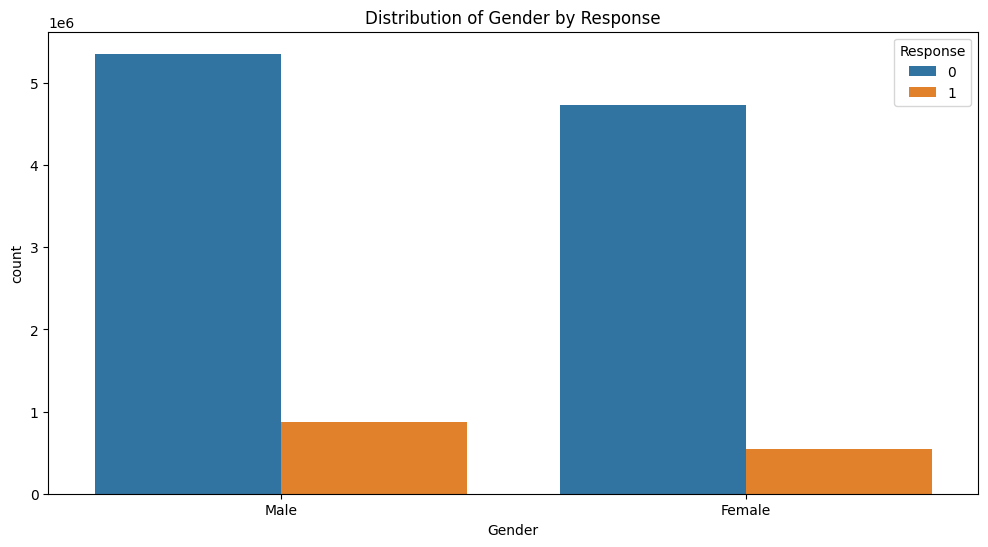

,Total Count,Total Percentage,0 of Total (%),1 of Total (%),0 within Gender (%),1 within Gender (%)
Gender,,,,,,
Male,6228134,54.135101,53.104803,61.481394,86.031161,13.968839
Female,5276664,45.864899,46.895197,38.518606,89.670349,10.329651


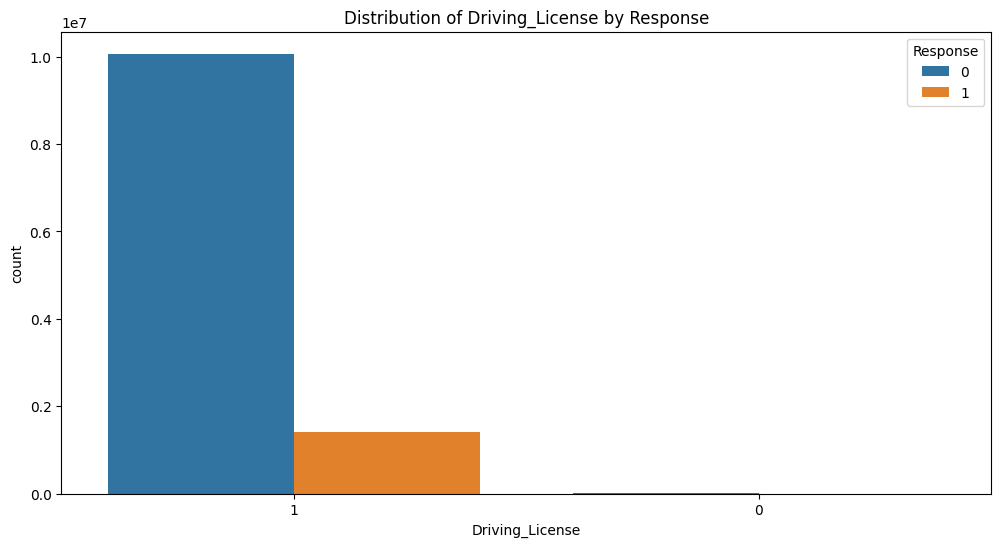

,Total Count,Total Percentage,0 of Total (%),1 of Total (%),0 within Driving_License (%),1 within Driving_License (%)
Driving_License,,,,,,
1,11482041,99.802196,99.786892,99.911311,87.686823,12.313177
0,22757,0.197804,0.213108,0.088689,94.485213,5.514787


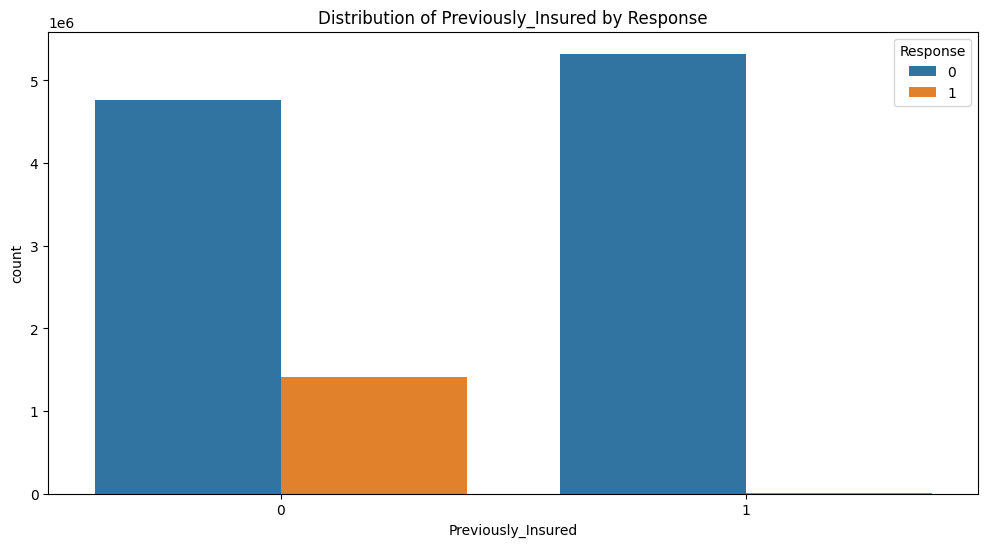

,Total Count,Total Percentage,0 of Total (%),1 of Total (%),0 within Previously_Insured (%),1 within Previously_Insured (%)
Previously_Insured,,,,,,
0,6178116,53.700343,47.240637,99.759727,77.150656,22.849344
1,5326682,46.299657,52.759363,0.240273,99.936170,0.063830


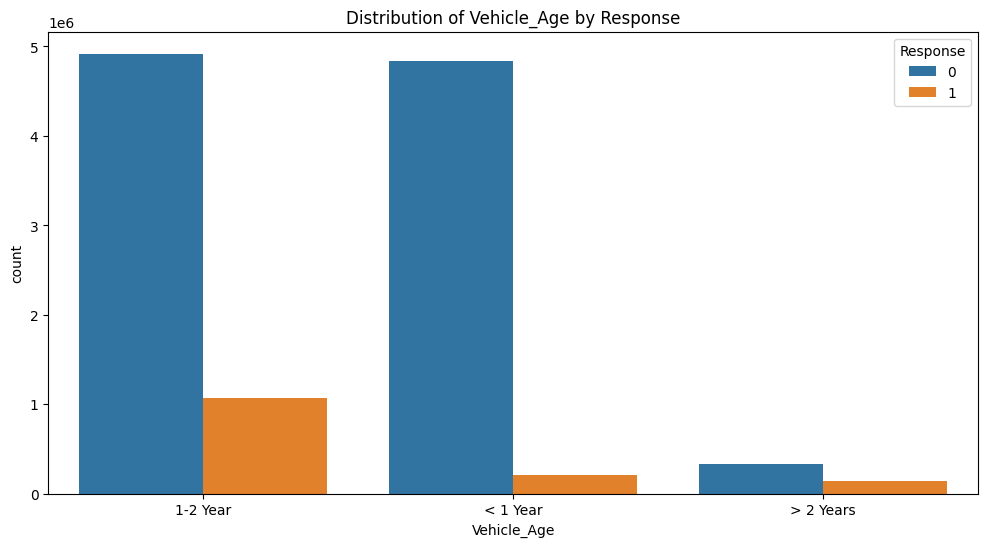

,Total Count,Total Percentage,0 of Total (%),1 of Total (%),0 within Vehicle_Age (%),1 within Vehicle_Age (%)
Vehicle_Age,,,,,,
1-2 Year,5982678,52.001591,48.756524,75.139764,82.227491,17.772509
< 1 Year,5044145,43.843838,47.922905,14.759031,95.859576,4.140424
> 2 Years,477975,4.154571,3.320572,10.101204,70.095089,29.904911


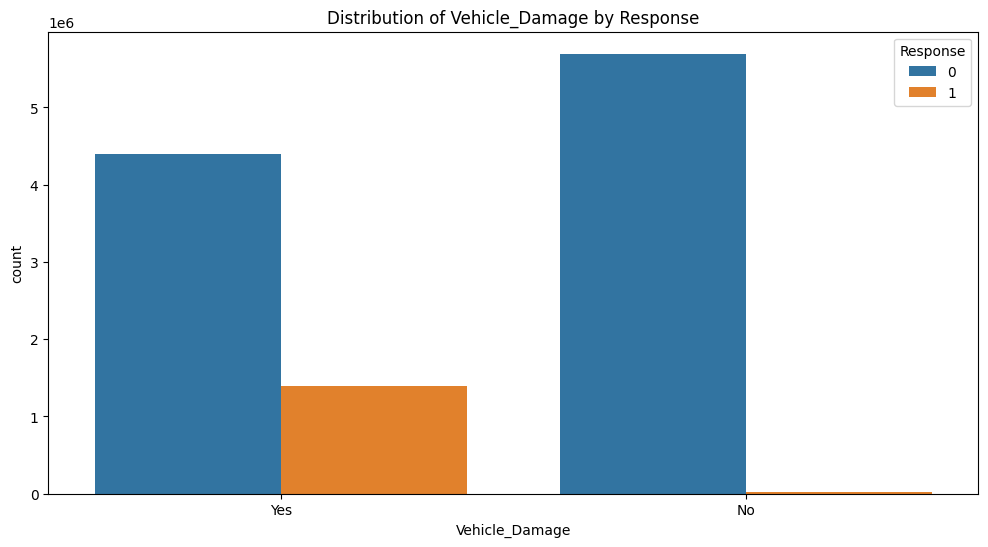

,Total Count,Total Percentage,0 of Total (%),1 of Total (%),0 within Vehicle_Damage (%),1 within Vehicle_Damage (%)
Vehicle_Damage,,,,,,
Yes,5783229,50.267975,43.531265,98.302474,75.947036,24.052964
No,5721569,49.732025,56.468735,1.697526,99.580168,0.419832


In [12]:
for col in cat_cols:
    cat_stats = sd.analyze.categorical_feature(train, col, 'Response')
    display(cat_stats)

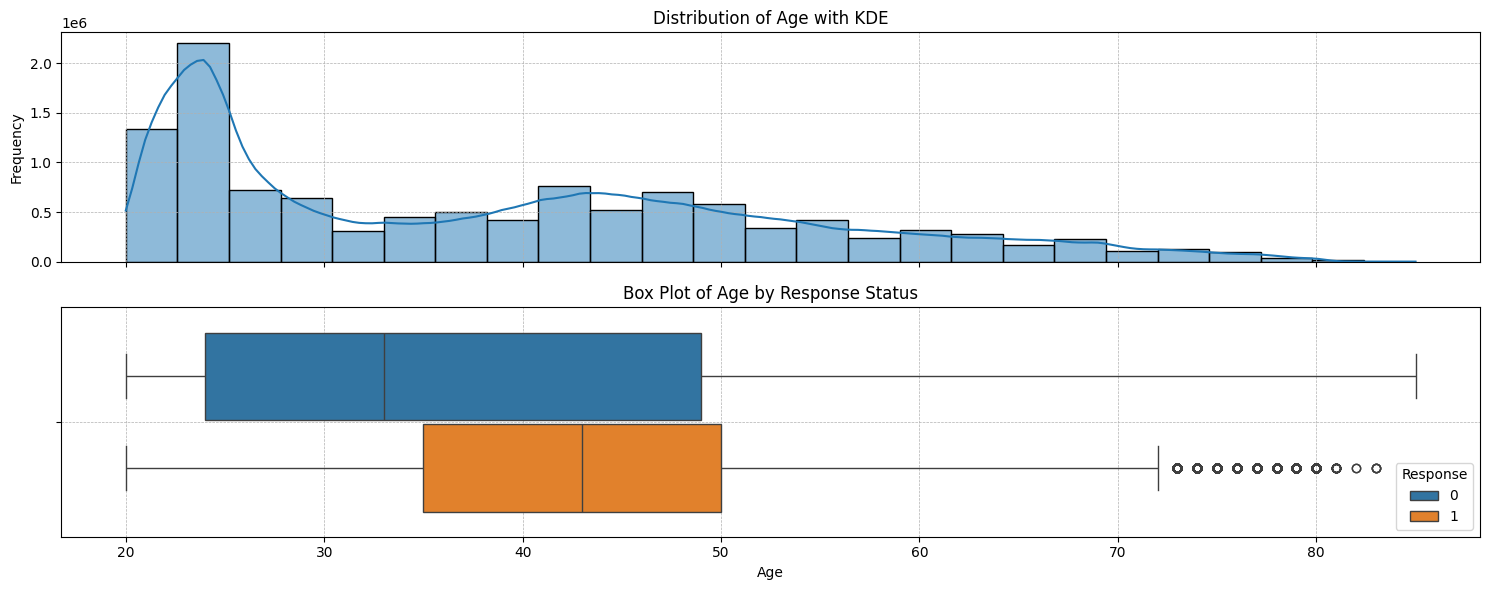

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.0,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
Age_Overall,11504798.0,38.383563,14.993459,20.0,24.0,36.0,49.0,85.0
Age_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


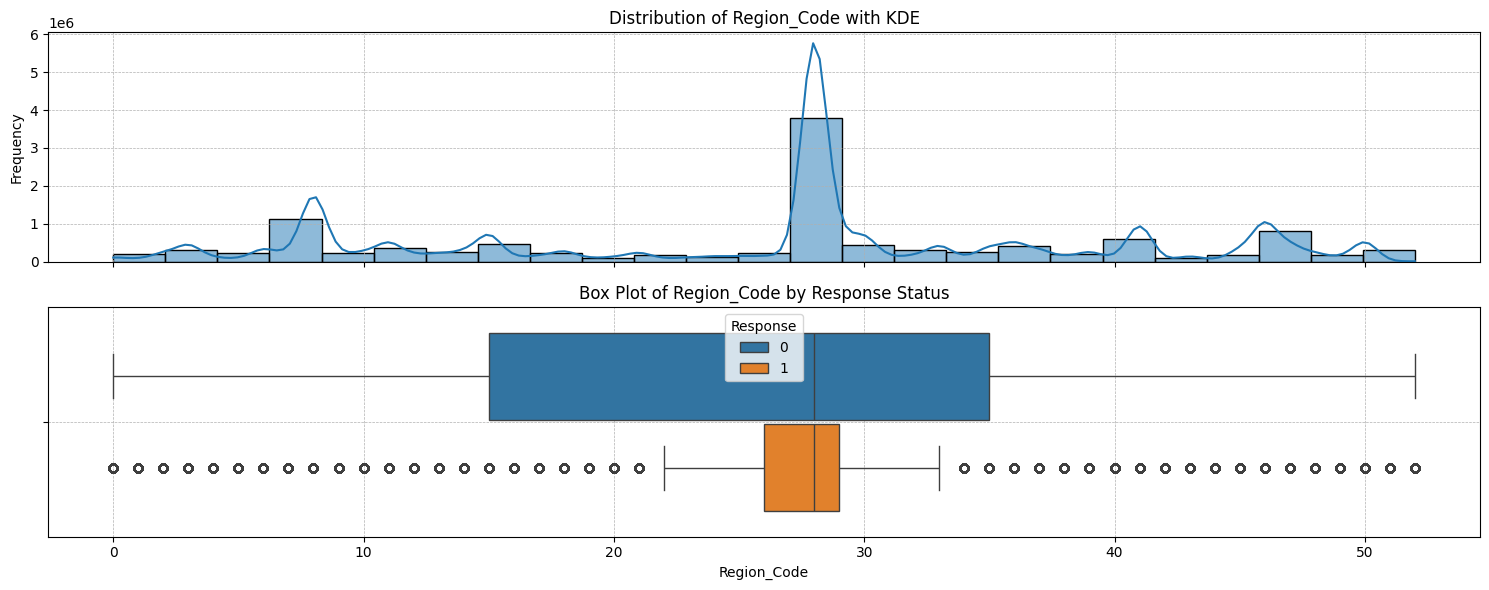

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.0,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
Region_Code_Overall,11504798.0,26.41869,12.99159,0.0,15.0,28.0,35.0,52.0
Region_Code_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region_Code_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


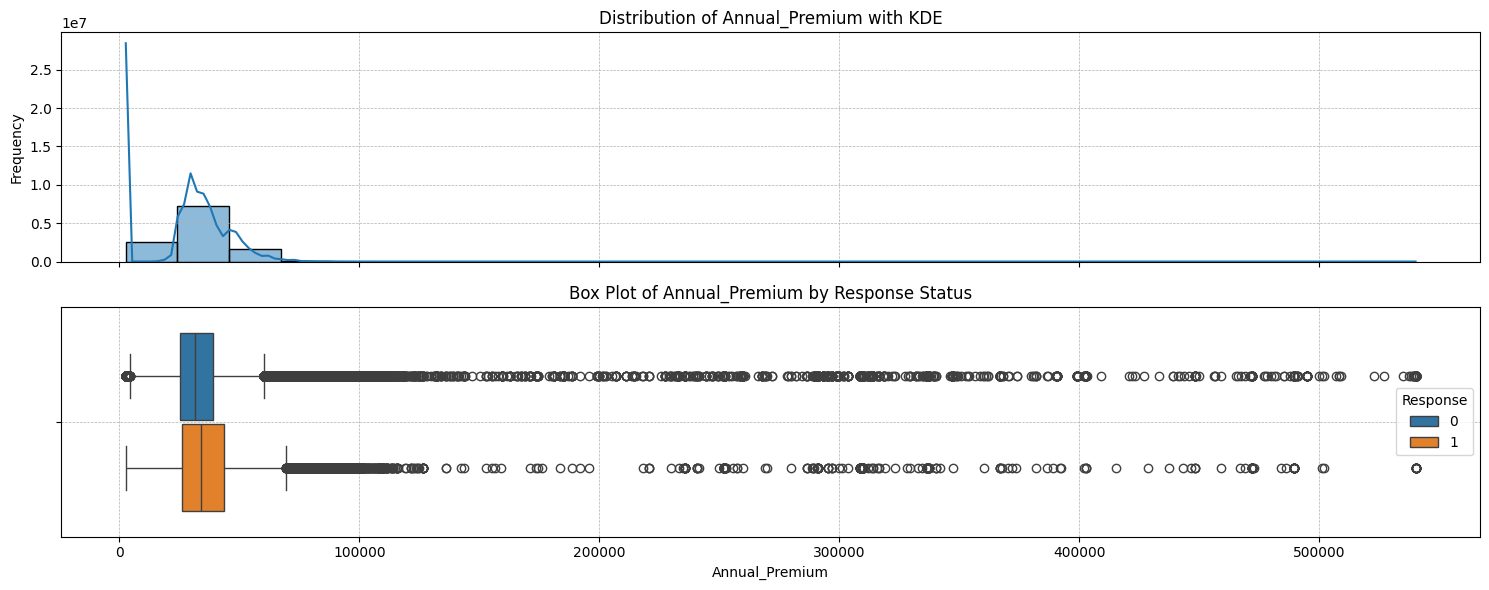

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,20.663318,18.364025,2.299293


,count,mean,std,min,25%,50%,75%,max
Annual_Premium_Overall,11504798.0,30461.370411,16454.745205,2630.0,25277.0,31824.0,39451.0,540165.0
Annual_Premium_Lower_Outliers,2112744.0,2630.066331,8.155557,2630.0,2630.0,2630.0,2630.0,4013.0
Annual_Premium_Upper_Outliers,264529.0,69043.669934,22163.647025,60713.0,62631.0,65432.0,71044.0,540165.0


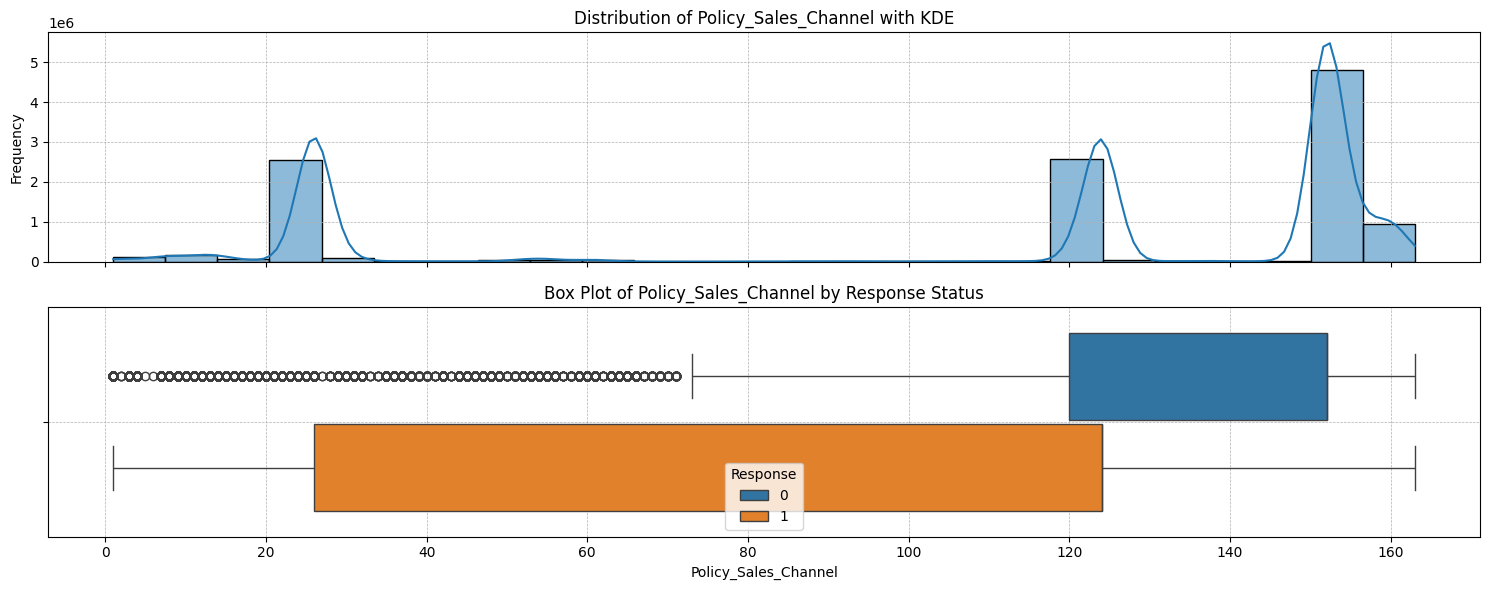

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.0,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
Policy_Sales_Channel_Overall,11504798.0,112.425442,54.035708,1.0,29.0,151.0,152.0,163.0
Policy_Sales_Channel_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Policy_Sales_Channel_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


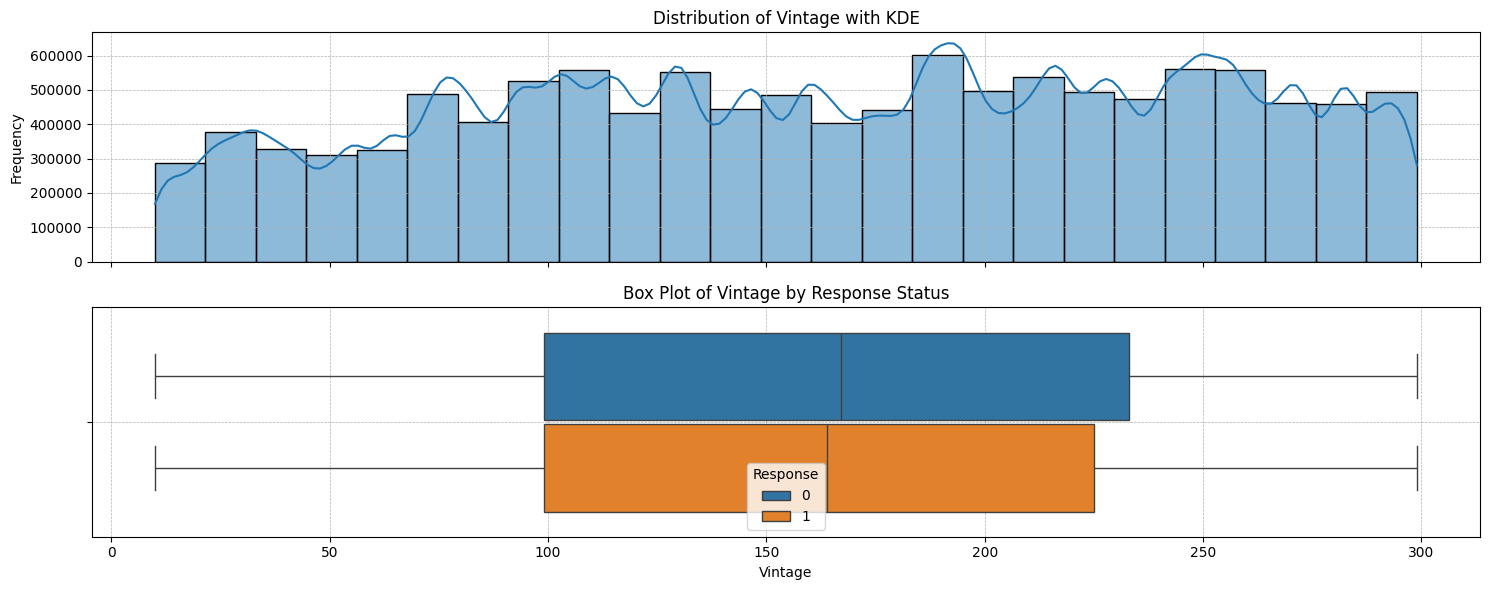

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.0,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
Vintage_Overall,11504798.0,163.897744,79.979531,10.0,99.0,166.0,232.0,299.0
Vintage_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vintage_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
for col in num_cols:
    outliers, summary = sd.analyze.numerical_feature(train, col, 'Response')
    display(outliers)
    display(summary)